In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data_url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(data_url)

In [13]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [15]:
# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
not_clean_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'N']
not_clean_cars_info = not_clean_cars[['Make', 'Model', 'Electric Vehicle Type']]
print("Cars that do not qualify for clean alternative fuel vehicle:")
print(not_clean_cars_info)
print()

Cars that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Model, Electric Vehicle Type]
Index: []



In [18]:
# Get all TESLA cars with the model year and model type made in Bothell City
tesla_cars_bothell = df[(df['Make'] == 'TESLA') & (df['City'] == 'BOTHELL')]
tesla_cars_info = tesla_cars_bothell[['Model Year', 'Model']]
print("TESLA cars made in Bothell City:")
print(tesla_cars_info)
print()

TESLA cars made in Bothell City:
Empty DataFrame
Columns: [Model Year, Model]
Index: []



In [19]:
# Get all the cars that have an electric range of more than 100 and were made after 2015
electric_cars = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]
electric_cars_info = electric_cars[['Make', 'Model', 'Model Year']]
print("Cars with electric range > 100 made after 2015:")
print(electric_cars_info)
print()

Cars with electric range > 100 made after 2015:
          Make    Model  Model Year
0        TESLA  MODEL X        2018
2        TESLA  MODEL 3        2019
4        TESLA  MODEL S        2017
12       TESLA  MODEL 3        2020
13       TESLA  MODEL 3        2020
...        ...      ...         ...
130417   TESLA  MODEL Y        2020
130428  NISSAN     LEAF        2018
130432   TESLA  MODEL Y        2020
130436   TESLA  MODEL 3        2018
130441   TESLA  MODEL X        2020

[34066 rows x 3 columns]



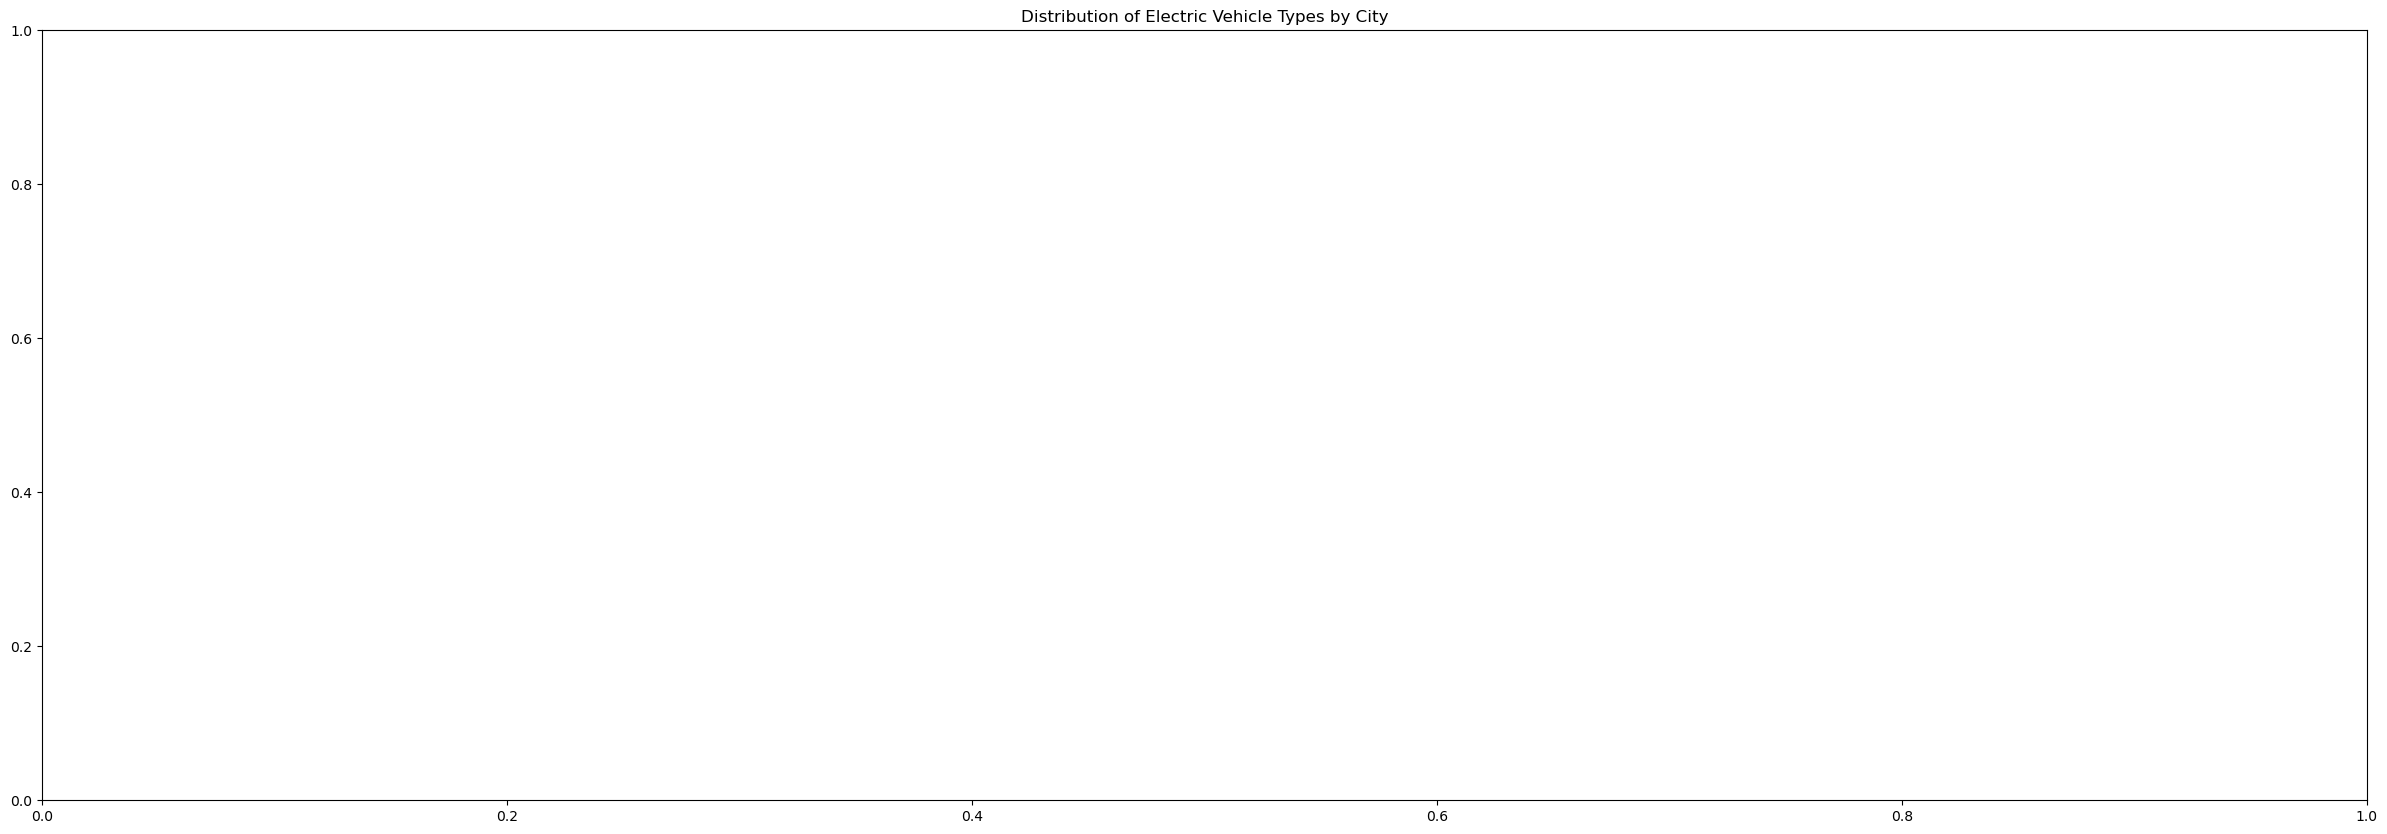

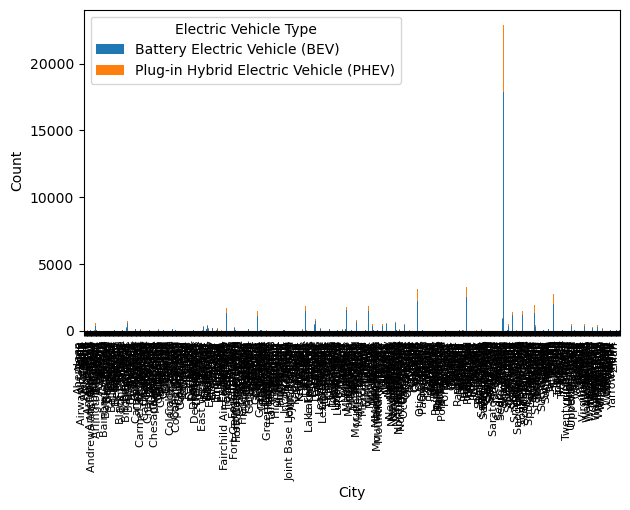

In [29]:
# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(30, 10))
plt.title("Distribution of Electric Vehicle Types by City")
df_filtered = df[df['Electric Vehicle Type'].notna()]
ax = df_filtered.groupby(['City', 'Electric Vehicle Type']).size().unstack().plot(kind='bar', stacked=True)
ax.set_xlabel('City')
ax.set_ylabel('Count')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.legend(title='Electric Vehicle Type')
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Adjust the bottom spacing
plt.show()